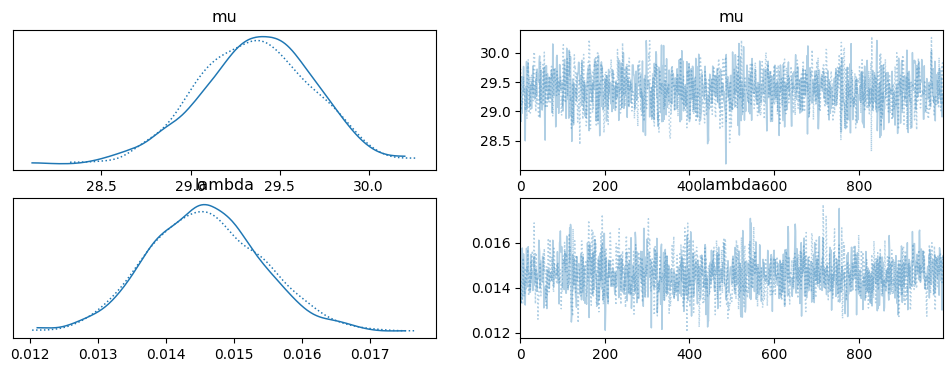

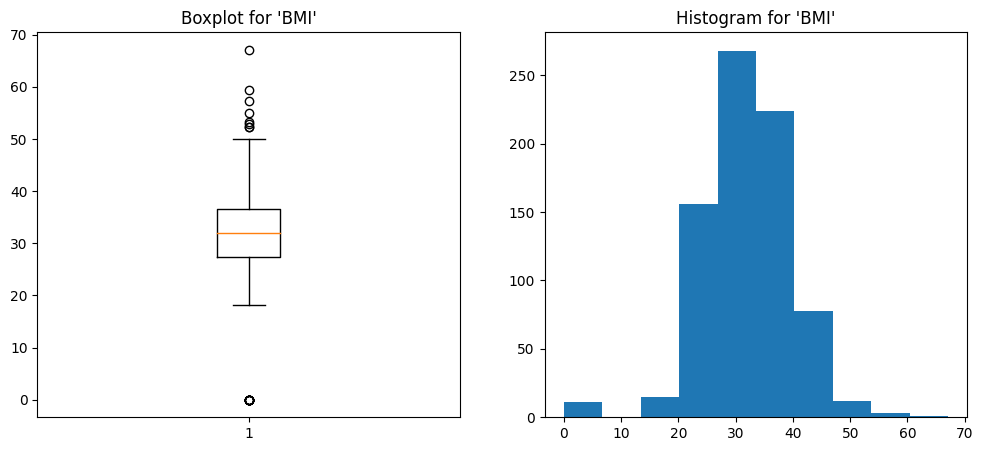

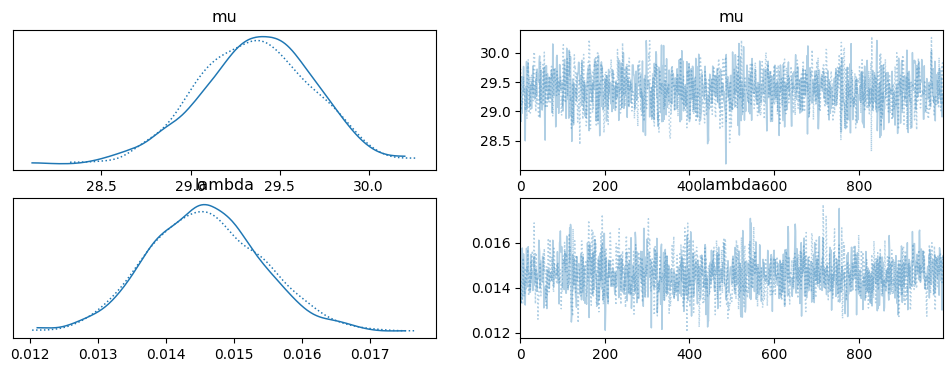

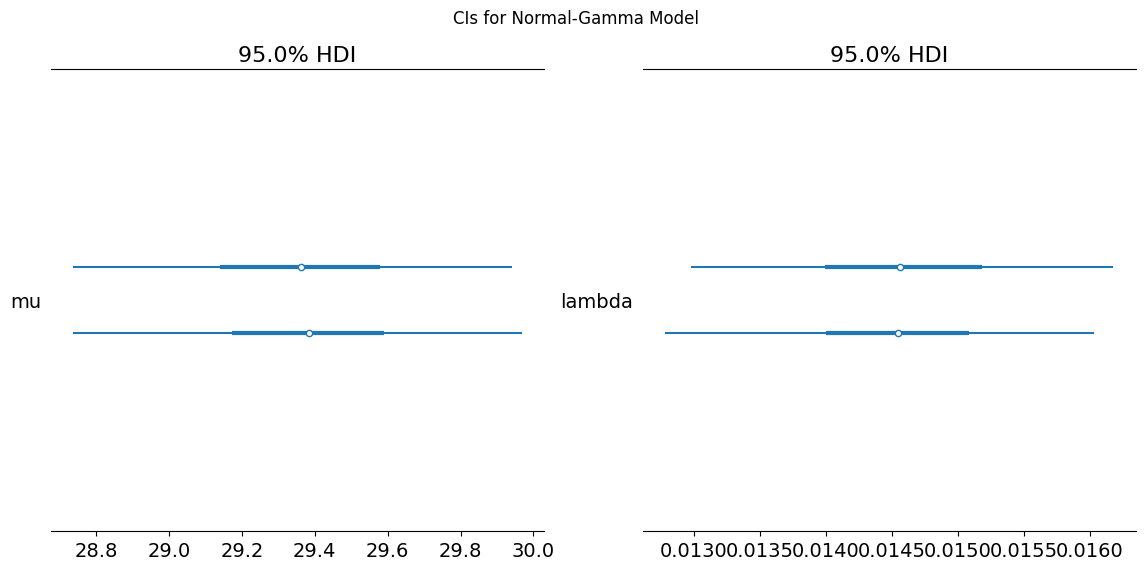

In [16]:
import pandas as pd
import pymc as pm
import arviz as az

# Step 1: Load the dataset
# Replace 'your_dataset.csv' with the actual file path
df = pd.read_csv('diabetes.csv')

# Step 2: Extract the column for analysis
# Replace 'column_name' with the actual column name
data_column = df['BMI'].values

# Step 3: Specify PyMC Normal-Gamma Model
normal_gamma_model = pm.Model()
with normal_gamma_model:
    # Define prior for mean (mu) and precision (lambda) parameters
    mu = pm.Normal("mu", mu=0, tau=1)
    lambda_ = pm.Gamma("lambda", alpha=2, beta=1/2)

    # Define likelihood for the observed data
    obs = pm.Normal("obs", mu=mu, tau=lambda_, observed=data_column)

# Step 4: Perform MCMC Sampling
with normal_gamma_model:
    idata = pm.sample()

# Step 5: Analyze Results
az.summary(idata, round_to=2)
az.plot_trace(idata)
# Additional exploratory data analysis (EDA) for both columns
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.boxplot(data_column)
plt.title("Boxplot for 'BMI'")
plt.subplot(1, 2, 2)
plt.hist(data_column)
plt.title("Histogram for 'BMI'")
plt.show()


# Step 5: Analyze Results
az.summary(idata, round_to=2)
az.plot_trace(idata)

# CIs for normal-gamma model
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
az.plot_forest(idata, var_names=["mu"], combined=False, hdi_prob=0.95, ax=ax[0])
az.plot_forest(idata, var_names=["lambda"], combined=False, hdi_prob=0.95, ax=ax[1])
plt.suptitle("CIs for Normal-Gamma Model")
plt.show()


Summary Statistics for 'BMI':
count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
dtype: float64


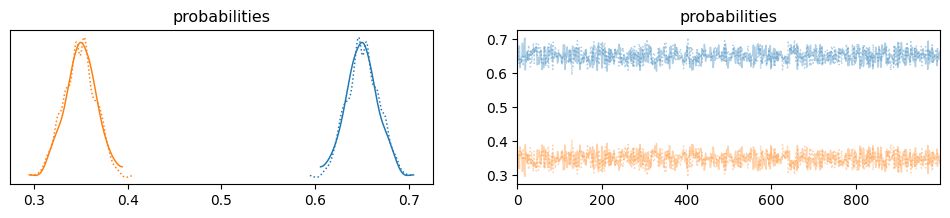

In [13]:
import pandas as pd
import pymc as pm
import arviz as az

# Step 1: Load the dataset
# Replace 'your_dataset.csv' with the actual file path
df = pd.read_csv('diabetes.csv')

# Step 2: Extract a categorical column for analysis
# Replace 'outcome_column' with the actual column name
outcome_column = df['Outcome'].values

# Step 3: Specify PyMC Categorical Model
number_of_categories = len(df['Outcome'].unique())  # Number of unique categories
categorical_model = pm.Model()
with categorical_model:
    # Define prior probabilities for each category
    probabilities = pm.Dirichlet("probabilities", a=[1] * number_of_categories)

    # Define likelihood for the observed data
    obs = pm.Categorical("obs", p=probabilities, observed=outcome_column)

# Step 4: Perform MCMC Sampling
with categorical_model:
    idata = pm.sample()

# Step 5: Analyze Results
az.summary(idata, round_to=2)
az.plot_trace(idata)
# Additional summary statistics for the 'data_column'
print("Summary Statistics for 'BMI':")
print(pd.Series(data_column).describe())


array([[<Axes: title={'center': 'rate'}>,
        <Axes: title={'center': 'rate'}>]], dtype=object)

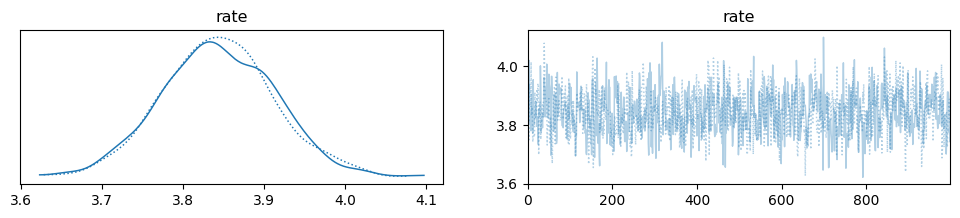

In [5]:
import pandas as pd
import pymc as pm
import arviz as az

# Step 1: Load the dataset
# Replace 'your_dataset.csv' with the actual file path
df = pd.read_csv('diabetes.csv')

# Step 2: Extract a count data column for analysis
# Replace 'pregnancies_column' with the actual column name
pregnancies_column = df['Pregnancies'].values

# Step 3: Specify PyMC Poisson Model
poisson_model = pm.Model()
with poisson_model:
    # Define prior for the rate parameter of the Poisson distribution
    rate = pm.Gamma("rate", alpha=2, beta=1/2)

    # Define likelihood for the observed count data
    obs = pm.Poisson("obs", mu=rate, observed=pregnancies_column)

# Step 4: Perform MCMC Sampling
with poisson_model:
    idata = pm.sample()

# Step 5: Analyze Results
az.summary(idata, round_to=2)
az.plot_trace(idata)


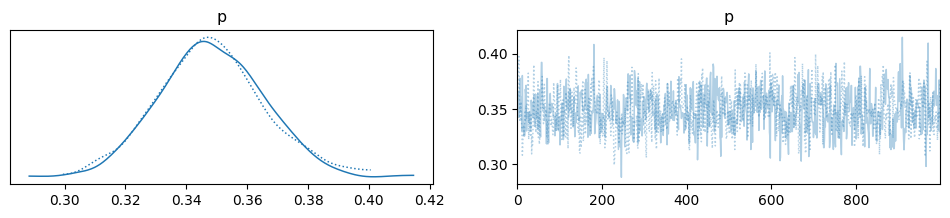

<Figure size 800x400 with 0 Axes>

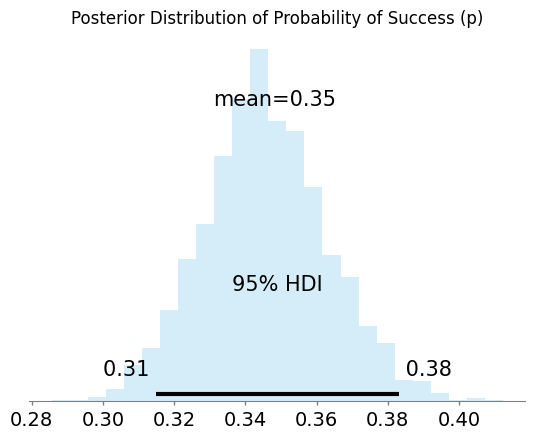

Summary Statistics for 'Pregnancies':
count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
dtype: float64


array([[<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'mu'}>],
       [<Axes: title={'center': 'lambda'}>,
        <Axes: title={'center': 'lambda'}>]], dtype=object)

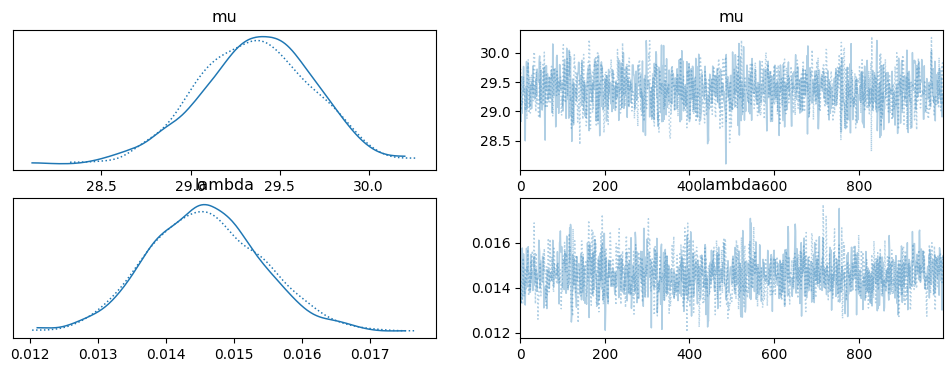

In [20]:
import pandas as pd
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

# Step 1: Load the dataset
# Replace 'your_dataset.csv' with the actual file path
df = pd.read_csv('diabetes.csv')

# Step 2: Extract the column for analysis
# Replace 'column_name' with the actual column name
data_column = df['Outcome'].values  # Assuming 'Outcome' is the categorical column

# Step 3: Specify PyMC Binomial Model
binomial_model = pm.Model()
with binomial_model:
    # Define prior for probability of success (p)
    p = pm.Beta("p", alpha=1, beta=1)

    # Define likelihood for the observed binary data
    obs = pm.Binomial("obs", n=len(data_column), p=p, observed=sum(data_column))

# Step 4: Perform MCMC Sampling
with binomial_model:
    idata_binomial = pm.sample()

# Step 5: Analyze Results
az.summary(idata_binomial, round_to=2)
az.plot_trace(idata_binomial)

# Visualize the posterior distribution for the probability of success (p)
plt.figure(figsize=(8, 4))
az.plot_posterior(idata_binomial, var_names=["p"], kind="hist", bins=25, color="skyblue", hdi_prob=0.95)
plt.title("Posterior Distribution of Probability of Success (p)")
plt.show()
# Additional summary statistics for the 'data_column'
print("Summary Statistics for 'Pregnancies':")
print(pd.Series(pregnancies_column).describe())

# ... (your existing code)

# Step 5: Analyze Results
az.summary(idata, round_to=2)
az.plot_trace(idata)


